Shape of the input image: (826, 646, 13)


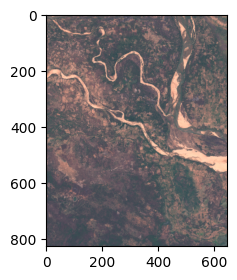

In [13]:
import rasterio
import matplotlib.pyplot as plt

with rasterio.open('example.tiff') as f:
    bands = f.read()
    bands = bands[:-1, :, :]
    datamask = bands[-1, :, :]
    bands = bands.transpose((1, 2, 0))

print('Shape of the input image:', bands.shape)
plt.figure(figsize = (3,3))
plt.imshow(bands[:, :, [3, 2, 1]].clip(0, 3000)/3000) # RGB bands
plt.show()

100%|██████████| 3/3 [00:00<?, ?it/s]


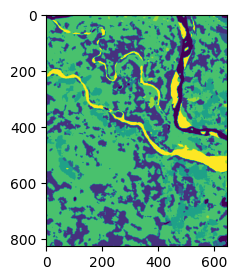

In [16]:
from dynamicworld.inference import Inference

inference = Inference(all_bands=True)
out = inference.predict(bands)
out = out.argmax(-1)

plt.figure(figsize = (3,3))
plt.imshow(out)
plt.show()